# Import Statements

In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow import data as tf_data
import keras
from keras import layers
from tensorflow import data as tf_data
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-22 08:33:41.978192: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 08:33:42.498529: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 08:33:42.504001: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 08:33:44.583559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#!unzip -q '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/archive.zip'

# Loading Data

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [25]:
import keras
from keras.preprocessing import image

# Assuming image_size and batch_size are defined somewhere in your code
image_size = (224, 224)
batch_size = 32

train_dir = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train'
test_dir = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test'

train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",  # Subset should be "training" for the training dataset
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",  # Subset should be "validation" for the validation dataset
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 242 files belonging to 3 classes.
Using 194 files for training.
Found 242 files belonging to 3 classes.
Using 48 files for validation.
Found 63 files belonging to 3 classes.


In [5]:
train_ds.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [26]:
import os

max_images = 100
num_skipped = 0

for dataset_dir in [train_dir, test_dir]:
    for folder_name in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder_name)
        if not os.path.isdir(folder_path):
            continue
        
        for fname in os.listdir(folder_path):
            fpath = os.path.join(folder_path, fname)
            try:
                with open(fpath, "rb") as fobj:
                    is_jfif = b"JFIF" in fobj.peek(10)
            except Exception as e:
                print(f"Error reading file {fpath}: {e}")
                is_jfif = False
            
            if not is_jfif or num_skipped >= max_images:
                num_skipped += 1
                os.remove(fpath)  # removes corrupted images

print(f"Deleted {num_skipped} images.")


Deleted 0 images.


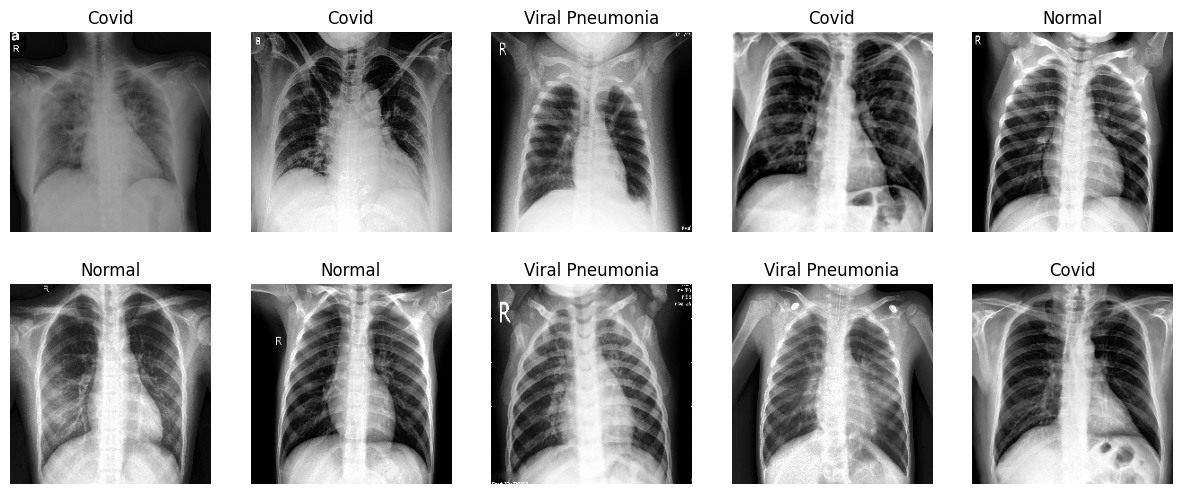

In [7]:
class_indices = train_ds.class_indices

# Get a batch of images and their corresponding labels from the train_ds
images, labels = train_ds.next()

# Plot the images along with their corresponding class labels
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title(list(class_indices.keys())[np.argmax(labels[i])])  # Get class label from class indices
    plt.axis('off')

plt.show()

# Creating Base Model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def base_model()
    # Initialize the model
    model = Sequential()

    # Add convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output of the convolutional layers
    model.add(Flatten())

    # Add fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Output layer with softmax activation for 3 classes

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Print a summary of the model architecture
    model.summary()

base_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 128)     

In [16]:
model_fit = base_model.fit(train_ds,
            steps_per_epoch = 3,
            epochs = 8,
            validation_data = test_ds)

Epoch 1/8


2024-04-22 08:39:53.787837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - ETA: 0s - loss: 1.5171 - accuracy: 0.3667

2024-04-22 08:39:58.321309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 13s 5s/step - loss: 1.5171 - accuracy: 0.3667 - val_loss: 0.9011 - val_accuracy: 0.6970
Epoch 2/8
3/3 [==============================] - 4s 2s/step - loss: 0.8265 - accuracy: 0.9000 - val_loss: 0.7506 - val_accuracy: 0.8333
Epoch 3/8
3/3 [==============================] - 4s 2s/step - loss: 0.9511 - accuracy: 0.6667 - val_loss: 1.1020 - val_accuracy: 0.4394
Epoch 4/8
3/3 [==============================] - 5s 2s/step - loss: 0.6641 - accuracy: 0.6190 - val_loss: 0.9132 - val_accuracy: 0.6515
Epoch 5/8
3/3 [==============================] - 5s 2s/step - loss: 0.5302 - accuracy: 0.7667 - val_loss: 0.7158 - val_accuracy: 0.6667
Epoch 6/8
3/3 [==============================] - 5s 2s/step - loss: 0.4486 - accuracy: 0.8095 - val_loss: 0.5414 - val_accuracy: 0.7424
Epoch 7/8
3/3 [==============================] - 4s 2s/step - loss: 0.3745 - accuracy: 0.8667 - val_loss: 0.3694 - val_accuracy: 0.8333
Epoch 8/8
3/3 [==============================] - 5s 2s/st

# Training-Validation Loss Models

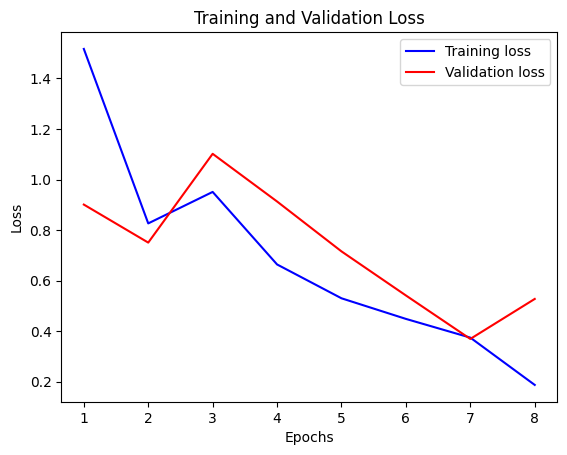

In [17]:
# Extracting training and validation loss history
train_loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

# Creating epochs range for x-axis
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

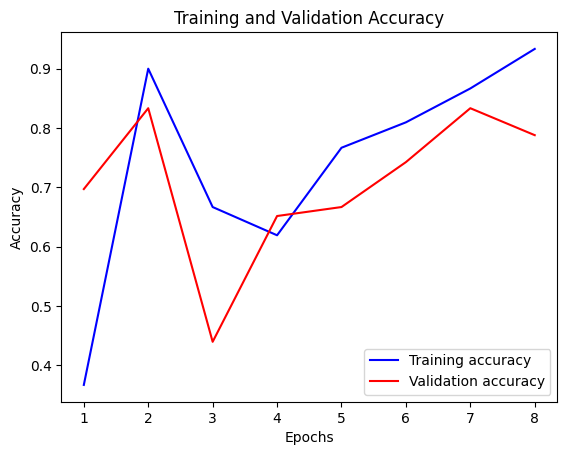

In [18]:
# Extracting training and validation accuracy history
train_acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']

# Creating epochs range for x-axis
epochs = range(1, len(train_acc) + 1)

# Plotting training and validation accuracy
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Saving Base Model

In [19]:
# Specify the file path where you want to save the model
model_path = '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/BaseModel'

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)

INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/BaseModel/assets


INFO:tensorflow:Assets written to: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/BaseModel/assets


Model saved successfully at: /mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/BaseModel
